In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

plt.ion()
%matplotlib widget


In [2]:
# Sweep over 1/sqrt(RO) values for RO amplitude
RO_div = np.array([1, 2, 4, 6, 8, 10])


In [20]:
def get_pulse_area_ratio(ratio, plot=False):

    # data = np.loadtxt(f'Data/AWG_{ratio}.csv', delimiter=',', skiprows=2)
    # data = np.loadtxt(f'Data/AWG_{ratio}_26072024.csv', delimiter=',', skiprows=2)
    # data = np.loadtxt(f'Data/AWG_{ratio}_29072024.csv', delimiter=',', skiprows=2)
    data = np.loadtxt(f'Data/AWG_{ratio}F_29072024.csv', delimiter=',', skiprows=2)

    # Normalise time
    data[:,0] = data[:,0] - data[0,0]
    data[:,0] = data[:,0] * 1e9


    # Detect peaks
    peaks, _ = find_peaks(data[:,1], distance=150, prominence=0.002)
    peak_RI = peaks[0]
    peak_RO = peaks[1]

    time_RI_1 = data[peak_RI,0] - 0.3
    time_RI_2 = data[peak_RI,0] + 0.3

    time_RO_1 = data[peak_RO,0] - 0.3
    time_RO_2 = data[peak_RO,0] + 0.3


    # Integrate the area under the curve between tiem_RO_1 and time_RO_2 abd time_RI_1 and time_RI_2
    area_RO = np.trapz(data[(data[:,0] > time_RO_1) & (data[:,0] < time_RO_2),1], x=data[(data[:,0] > time_RO_1) & (data[:,0] < time_RO_2),0])

    area_RI = np.trapz(data[(data[:,0] > time_RI_1) & (data[:,0] < time_RI_2),1], x=data[(data[:,0] > time_RI_1) & (data[:,0] < time_RI_2),0])

    pulse_area_ratio = area_RI/area_RO
    print(f'Pulse area ratio = {pulse_area_ratio}')

    # Plot data
    if plot == True:
        plt.figure()    
        plt.plot(data[:,0], data[:,1])
        plt.plot(data[peaks,0], data[peaks,1], 'x')
        plt.axvline(x=time_RI_1, color='r', linestyle='--')
        plt.axvline(x=time_RI_2, color='r', linestyle='--')
        plt.axvline(x=time_RO_1, color='g', linestyle='--')
        plt.axvline(x=time_RO_2, color='g', linestyle='--')
        plt.xlabel('Time (ns)')
        plt.ylabel('Voltage (V)')
        plt.title(f'Ratio RI/RO = {ratio/10}')
        plt.grid()
        plt.show()

    return pulse_area_ratio


Pulse area ratio = 0.32489664926553663


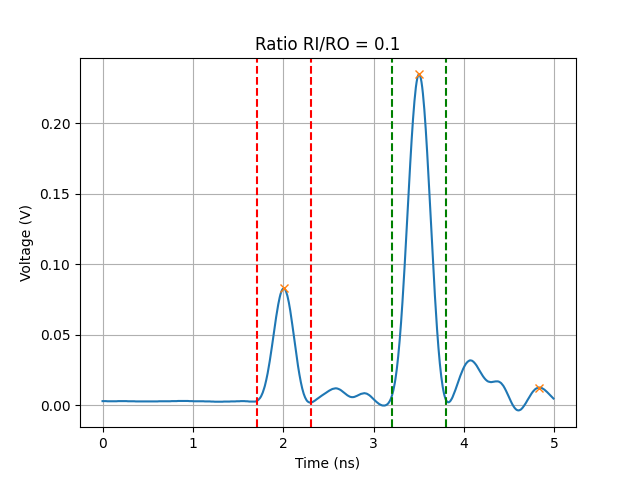

Pulse area ratio = 0.38782383683670263


/tmp/ipykernel_1048169/1799645724.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


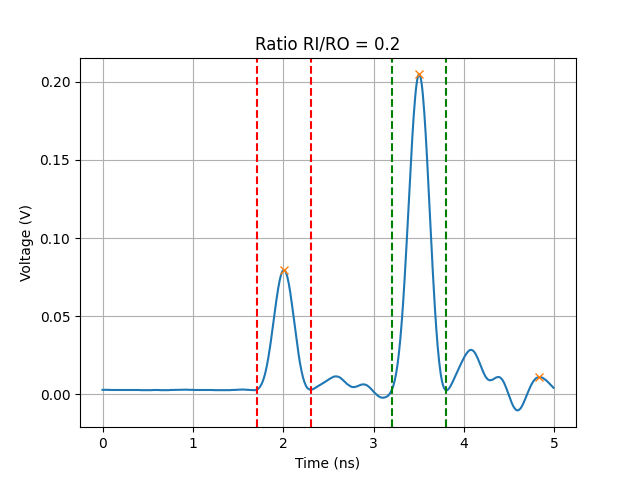

Pulse area ratio = 0.4428691500361594


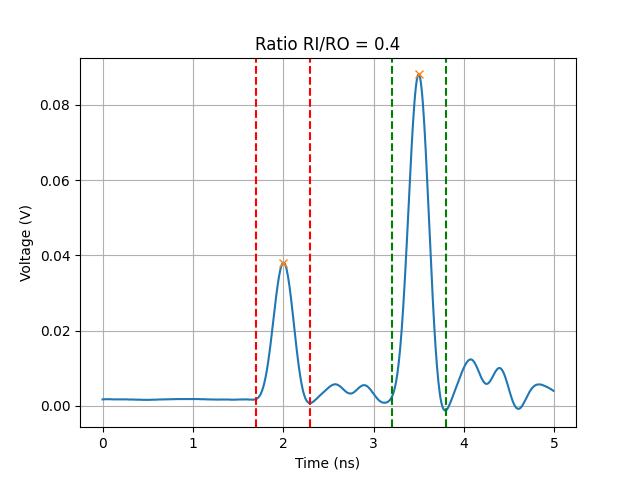

Pulse area ratio = 0.571570447505138


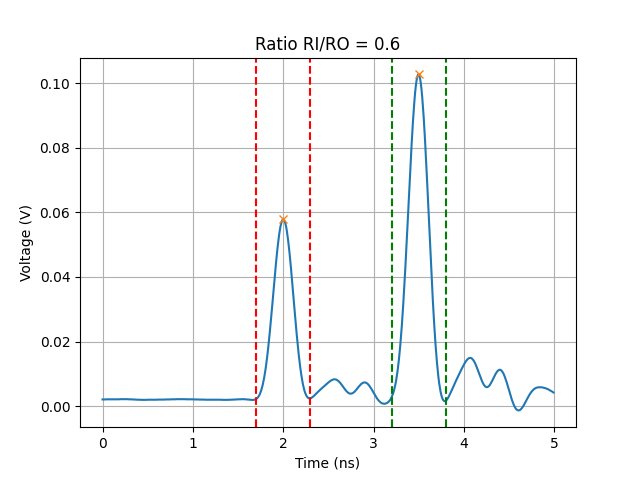

Pulse area ratio = 0.7943413439579768


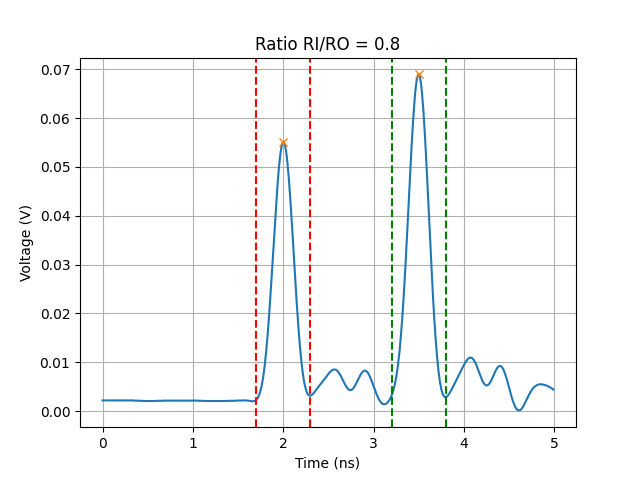

Pulse area ratio = 1.0249781304472523


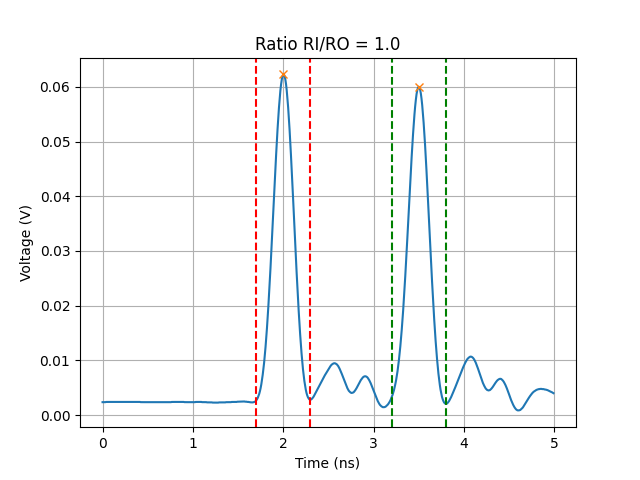

In [21]:
for ratio in RO_div:
    get_pulse_area_ratio(ratio, plot=True)

In [26]:
def check_RI_RO_pulse(ratio, plot=False):



    # data = np.loadtxt(f'Data/AWG_{ratio}.csv', delimiter=',', skiprows=2)
    data = np.loadtxt(f'Data/AWG_{ratio}_26072024.csv', delimiter=',', skiprows=2)
    # data = np.loadtxt(f'Data/AWG_{ratio}_29072024.csv', delimiter=',', skiprows=2)
    # data = np.loadtxt(f'Data/AWG_{ratio}F_29072024.csv', delimiter=',', skiprows=2)

    # Normalise time
    data[:,0] = data[:,0] - data[0,0]
    data[:,0] = data[:,0] * 1e9


    # Detect peaks
    peaks, _ = find_peaks(data[:,1], distance=200, prominence=0.0001)
    peak_RI = peaks[0]
    peak_RO = peaks[1]

    region_integrate = 0.15


    time_RI_1 = data[peak_RI,0] - region_integrate
    time_RI_2 = data[peak_RI,0] + region_integrate

    time_RO_1 = data[peak_RO,0] - region_integrate
    time_RO_2 = data[peak_RO,0] + region_integrate

    # Zoom in on readin data
    region = 0.3
    readin_data = data[(data[:,0] > (time_RI_1-region)) & (data[:,0] < (time_RI_2+region)),1]
    readin_time = data[(data[:,0] > (time_RI_1-region)) & (data[:,0] < (time_RI_2+region)),0]

    readout_data = data[(data[:,0] > (time_RO_1-region)) & (data[:,0] < (time_RO_2+region)),1]
    readout_time = data[(data[:,0] > (time_RO_1-region)) & (data[:,0] < (time_RO_2+region)),0]


    # Integrate the area under the curve between tiem_RO_1 and time_RO_2 abd time_RI_1 and time_RI_2
    area_RO = np.trapz(data[(data[:,0] > time_RO_1) & (data[:,0] < time_RO_2),1], x=data[(data[:,0] > time_RO_1) & (data[:,0] < time_RO_2),0])

    area_RI = np.trapz(data[(data[:,0] > time_RI_1) & (data[:,0] < time_RI_2),1], x=data[(data[:,0] > time_RI_1) & (data[:,0] < time_RI_2),0])

    print(area_RI)

    pulse_area_ratio = area_RI/area_RO
    print(f'Pulse area ratio = {pulse_area_ratio}')

    # Get FWHM
    FWHM = np.max(readin_data)/2
    peaks, _ = find_peaks(readin_data, height=FWHM)
    time_FWHM_1 = readin_time[peaks[0]]
    time_FWHM_2 = readin_time[peaks[-1]]
    print(f'FWHM readin = {time_FWHM_2 - time_FWHM_1}')



    # Plot data
    if plot == True:
        ax[0].plot(readin_time, readin_data, label=f'{ratio}')
        ax[0].axvline(x=time_RI_1-region_integrate, color='r', linestyle='--')
        ax[0].axvline(x=time_RI_2+region_integrate, color='r', linestyle='--')
        ax[0].set_ylabel('Voltage (V)')
        ax[0].set_title(f'RI peak')
        ax[0].legend()
        ax[0].grid()

        ax[1].plot(readout_time, readout_data, label=f'{ratio}')
        ax[1].axvline(x=time_RO_1-region_integrate, color='g', linestyle='--')
        ax[1].axvline(x=time_RO_2+region_integrate, color='g', linestyle='--')
        ax[1].set_xlabel('Time (ns)')
        ax[1].set_ylabel('Voltage (V)')
        ax[1].set_title(f'RO peak')
        ax[1].legend()
        ax[1].grid()


        # plt.plot(readin_time, readin_data)
        # plt.axvline(x=time_RI_1-region_readin, color='r', linestyle='--')
        # plt.axvline(x=time_RI_2+region_readin, color='r', linestyle='--')
        # plt.xlabel('Time (ns)')
        # plt.ylabel('Voltage (V)')
        # plt.title(f'Ratio RI/RO = {ratio/10}')
        # plt.grid()


    return area_RI, area_RO, pulse_area_ratio


0.0031156498808740697
Pulse area ratio = 0.048402081803094646
FWHM readin = 0.0
0.004909347735247043
Pulse area ratio = 0.08970804260348725
FWHM readin = 0.0
0.008608354122497207
Pulse area ratio = 0.23833736368782343
FWHM readin = 0.0
0.010989695721217682
Pulse area ratio = 0.4528422370928487
FWHM readin = 0.0
0.011673534653890809
Pulse area ratio = 0.7040490847160654
FWHM readin = 0.0
0.012532713549989093
Pulse area ratio = 0.9950636221938929
FWHM readin = 0.0


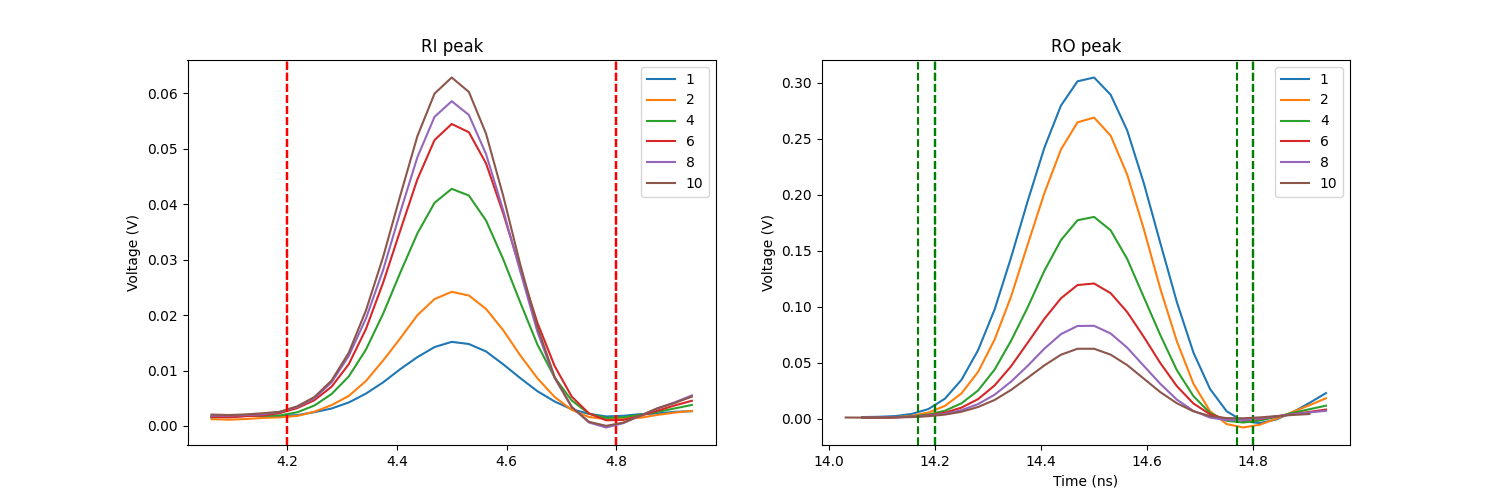

In [27]:
area_RI_list = []
area_RO_list = []
pulse_area_ratio_list = []

fig, ax = plt.subplots(1, 2, figsize=(15, 5))


for ratio in RO_div:
    area_RI, area_RO, pulse_area_ratio = check_RI_RO_pulse(ratio, plot=True)
    area_RI_list.append(area_RI)
    area_RO_list.append(area_RO)
    pulse_area_ratio_list.append(pulse_area_ratio)

plt.show()

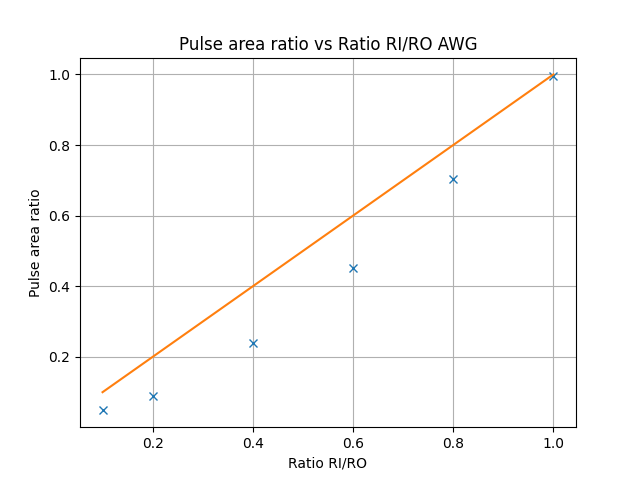

In [28]:
area_RI_list = np.array(area_RI_list)
area_RO_list = np.array(area_RO_list)
ratio_list = np.array([1, 2, 4, 6, 8, 10]) / 10
pulse_area_ratio_list = np.array(pulse_area_ratio_list)

plt.figure()
plt.plot(ratio_list, pulse_area_ratio_list, 'x')
plt.plot(ratio_list, ratio_list)
plt.xlabel('Ratio RI/RO')
plt.ylabel('Pulse area ratio')
plt.title('Pulse area ratio vs Ratio RI/RO AWG')
plt.grid()
plt.show()

RI/RO = [0.1 0.2 0.4 0.6 0.8 1. ]
Fudge factor = [0.24860138 0.39172265 0.68687073 0.87688079 0.9314451  1.        ]


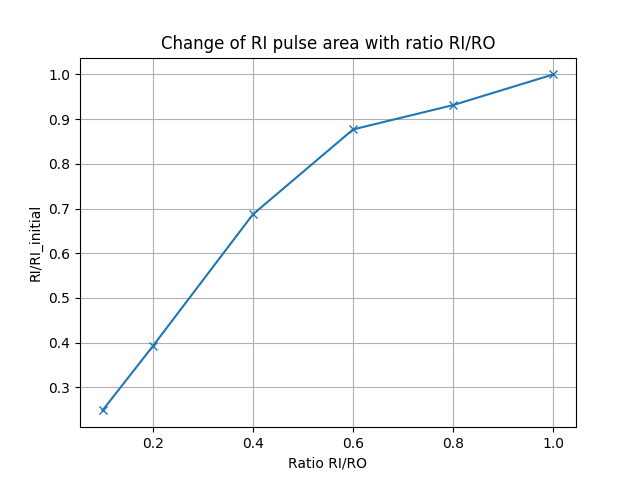

In [29]:
dynamic_RI = area_RI_list / area_RI_list[-1]
print(f'RI/RO = {ratio_list}')
print(f'Fudge factor = {dynamic_RI}')

plt.figure()
plt.plot(ratio_list, dynamic_RI, 'x-')
plt.xlabel('Ratio RI/RO')
plt.ylabel('RI/RI_initial')
plt.title('Change of RI pulse area with ratio RI/RO')
plt.grid()
plt.show()

RI/RO = [0.1 0.2 0.4 0.6 0.8 1. ]
Fudge factor = [5.11081714 4.34508373 2.86770008 1.92683478 1.31645244 1.        ]


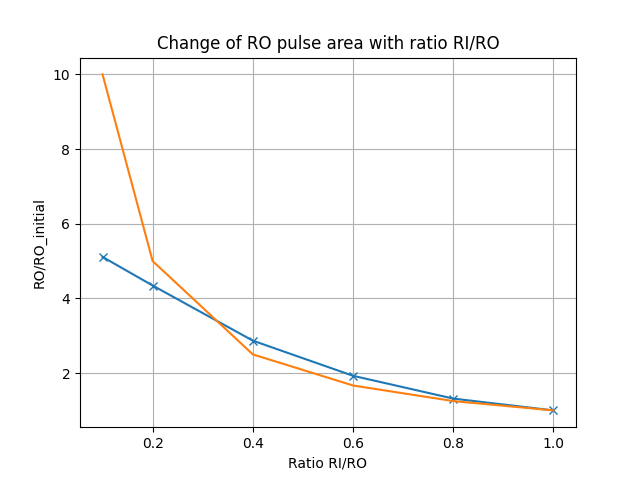

In [36]:
dynamic_RO = area_RO_list / area_RO_list[-1]
print(f'RI/RO = {ratio_list}')
print(f'Fudge factor = {dynamic_RO}')

plt.figure()
plt.plot(ratio_list, dynamic_RO, 'x-')
plt.plot(ratio_list, 1/ratio_list )
plt.xlabel('Ratio RI/RO')
plt.ylabel('RO/RO_initial')
plt.title('Change of RO pulse area with ratio RI/RO')
plt.grid()
plt.show()

Fraction RI = [0.04841043 0.08547619 0.19764105 0.31658039 0.41548716 0.49547394]
Fraction RO = [0.95158957 0.91452381 0.80235895 0.68341961 0.58451284 0.50452606]
Power from pulses = [505. 400. 275. 205. 175. 155.]
Total pulse area = [0.09125961 0.07644716 0.05708556 0.04522566 0.03592728 0.0322256 ]
Ratio RI/RO = [0.1 0.2 0.4 0.6 0.8 1. ]
Pulse area ratio = [0.05087322 0.09346524 0.24632498 0.46322988 0.7108264  0.98205815]
RI pulse power in pJ = [24.44726697 34.19047429 54.35128988 64.89897931 72.71025297 76.79846   ]
RO pulse power in pJ = [480.55273303 365.80952571 220.64871012 140.10102069 102.28974703
  78.20154   ]


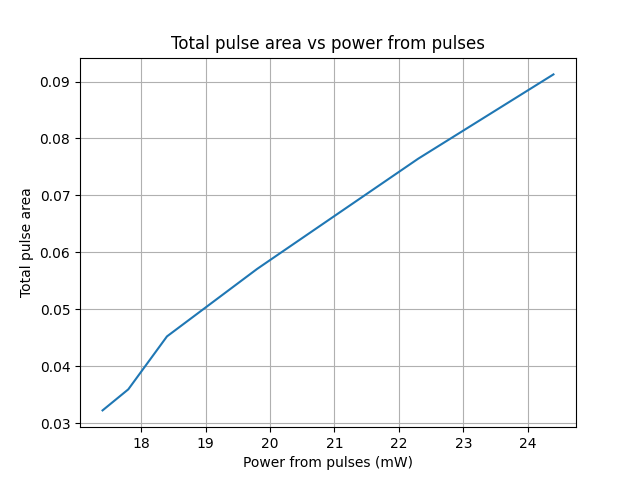

In [9]:
# Pulse energy analysis

w_pulses = np.array([24.4, 22.3, 19.8, 18.4, 17.8, 17.4])
w_o_pulses = 14.3

power_from_pulses = (w_pulses - w_o_pulses)*50
total_pulse_area = area_RI_list + area_RO_list
frac_RI = area_RI_list / total_pulse_area
frac_RO = area_RO_list / total_pulse_area
print(f'Fraction RI = {frac_RI}')
print(f'Fraction RO = {frac_RO}')

print(f'Power from pulses = {power_from_pulses}')
print(f'Total pulse area = {total_pulse_area}')
print(f'Ratio RI/RO = {ratio_list}')
print(f'Pulse area ratio = {pulse_area_ratio_list}')
RI_pulse_power = frac_RI * power_from_pulses
print(f'RI pulse power in pJ = {RI_pulse_power}')
RO_pulse_power = frac_RO * power_from_pulses
print(f'RO pulse power in pJ = {RO_pulse_power}')

plt.figure()
plt.plot(w_pulses, total_pulse_area)
plt.xlabel('Power from pulses (mW)')
plt.ylabel('Total pulse area')
plt.title('Total pulse area vs power from pulses')
plt.grid()
plt.show()




# data = np.loadtxt(f'Data/AWG_noseq_26072024.csv', delimiter=',', skiprows=2)

# # Normalise time
# data[:,0] = data[:,0] - data[0,0]
# data[:,0] = data[:,0] * 1e9

# plt.figure()
# plt.plot(data[:,0], data[:,1])
# plt.xlabel('Time (ns)')
# plt.ylabel('Voltage (V)')
# plt.title('No sequence pulse')
# plt.grid()
# plt.show()

# no_seq_voltage = np.mean(data[:,1])
# print(no_seq_voltage)